# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
print(mouse_study_complete.info())
mouse_study_complete.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB
None


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [4]:
# Checking the number of mice.
mouse_count = mouse_study_complete["Mouse ID"].nunique()
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoint = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
duplicate_mouse_IDs = duplicate_timepoint["Mouse ID"].unique()
duplicate_mouse_IDs

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mice IDs. 
mouse_bad_mask = mouse_study_complete["Mouse ID"].isin(duplicate_mouse_IDs)
mouse_study_complete.loc[mouse_bad_mask]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_complete.loc[~mouse_bad_mask]

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_table = pd.DataFrame({
    "Mean Tumor Volume" : mean,
    "Median Tumor Volume" : median,
    "Tumor Volume Variance" : variance,
    "Tumor Volume STD Dev." : std,
    "Tumor Volume STD. Err." : sem
})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD Dev.,Tumor Volume STD. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_table = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median','var','std','sem']})
agg_summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

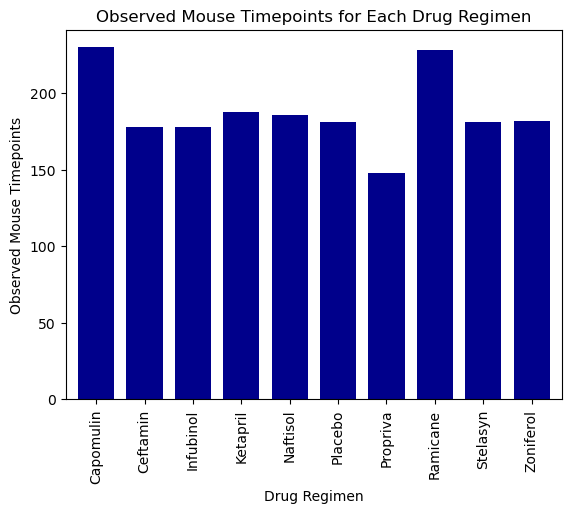

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df.groupby('Drug Regimen').count()['Mouse ID']

regimen_counts.plot(kind='bar', title='Observed Mouse Timepoints for Each Drug Regimen', color='darkblue', width = .75)
plt.xlabel('Drug Regimen')
plt.ylabel('Observed Mouse Timepoints')

plt.show()

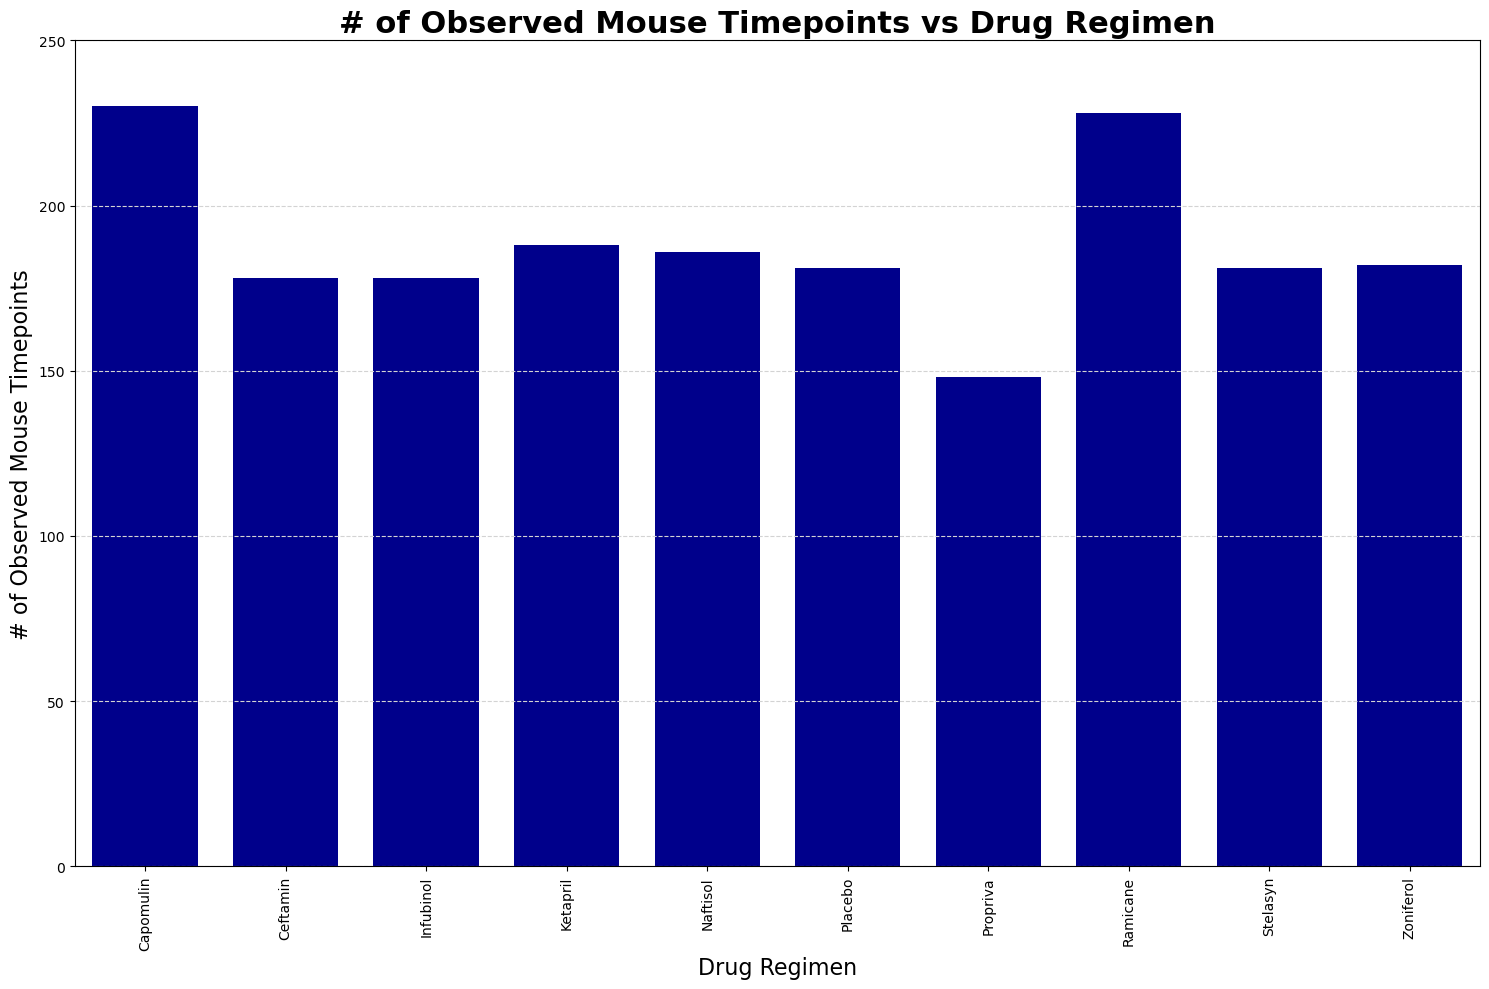

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Step 1: Get the data
regimen_counts = clean_df.groupby('Drug Regimen').count()['Mouse ID']

# Step 2: Create the Canvas
plt.figure(figsize=(15,10))

# Step 3: Create the skeleton plot
plt.bar(regimen_counts.index, regimen_counts.values, color="darkblue", width = .75)

# Step 4: Customization
plt.title("# of Observed Mouse Timepoints vs Drug Regimen", fontweight="bold", fontsize=22)
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=16)
plt.xlim(-0.5, 9.5)
plt.ylim(0, 250)
plt.xticks(rotation="vertical")

plt.grid(axis="y", color="lightgrey", linestyle="--")

# Step 5: Show/Save
plt.tight_layout()
plt.show()

array([<Axes: ylabel='count'>], dtype=object)

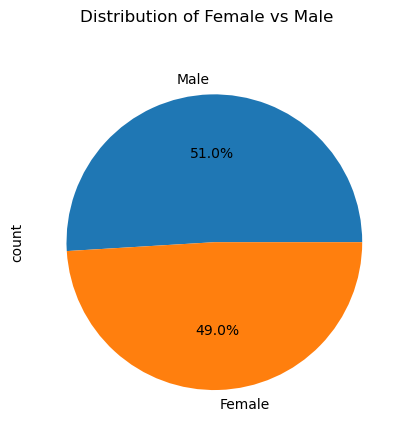

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df.Sex.value_counts()

sex_count.plot(kind='pie', autopct="%1.1f%%", subplots=True, title='Distribution of Female vs Male')


<function matplotlib.pyplot.show(close=None, block=None)>

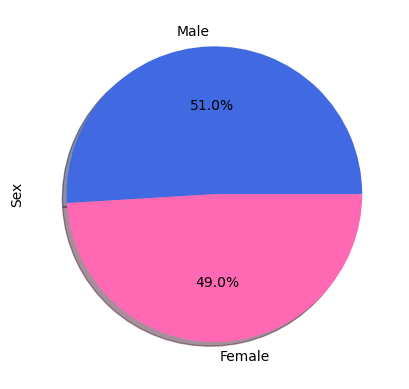

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count.values, labels=sex_count.index.values, colors= ["royalblue","hotpink"], 
        autopct="%1.1f%%", shadow=True)
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor = final_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_df, final_tumor, how="left", on=["Mouse ID", "Timepoint"])
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merge_df.loc[merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq- lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"({drug} potential  outliers: {outliers})")
    

(Capomulin potential  outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64)
(Ramicane potential  outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64)
(Infubinol potential  outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ceftamin potential  outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


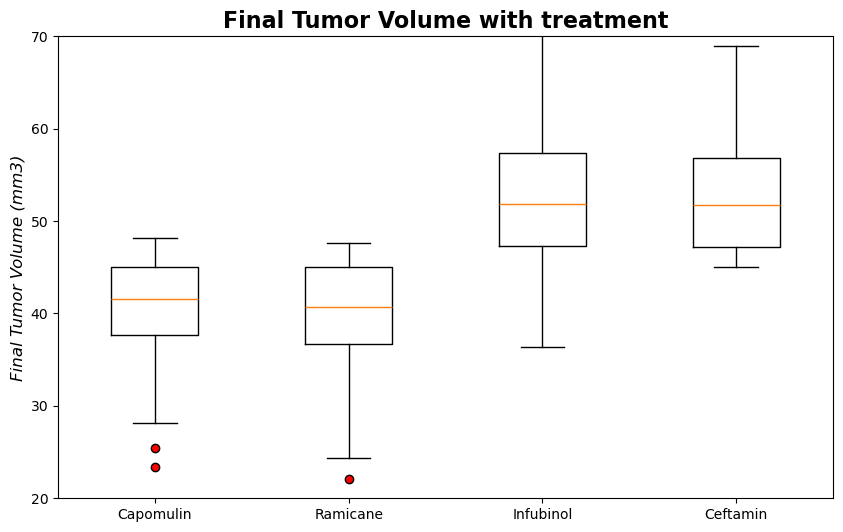

In [66]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# create the plot
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_list, labels= treatment_list, flierprops= dict(markerfacecolor='red'))

# customizations
plt.ylabel("Final Tumor Volume (mm3)", fontstyle="italic", fontsize=12)
plt.title("Final Tumor Volume with treatment", fontsize=16, fontweight="bold")
plt.ylim(20, 70)

# show
plt.show()

## Line and Scatter Plots

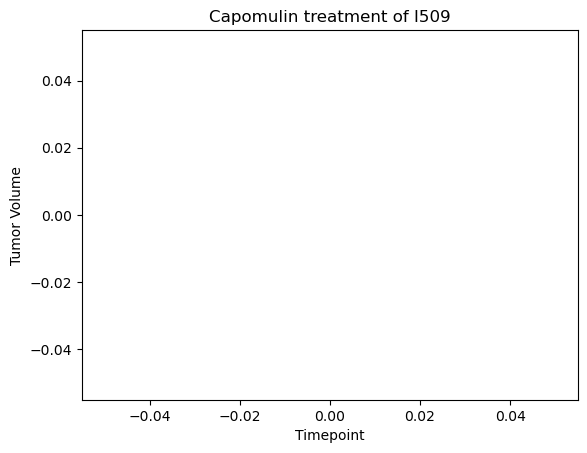

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
linedata = capomulin.loc[capomulin["Mouse ID"] == "I509"]

plt.plot(linedata['Timepoint'], linedata['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title('Capomulin treatment of I509')
plt.show()

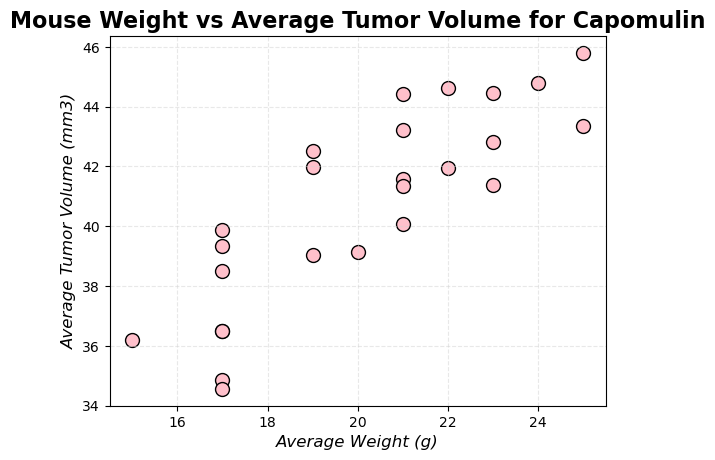

In [77]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_mean = capomulin.groupby(['Mouse ID'])[["Weight (g)", "Tumor Volume (mm3)"]].mean()

plt.scatter(capomulin_mean['Weight (g)'], capomulin_mean["Tumor Volume (mm3)"], facecolor="pink", edgecolor="black", s=100)
 
# Step 4: Customizations
plt.xlabel("Average Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.show()

## Correlation and Regression

the r^2 is : 0.7088568047708723


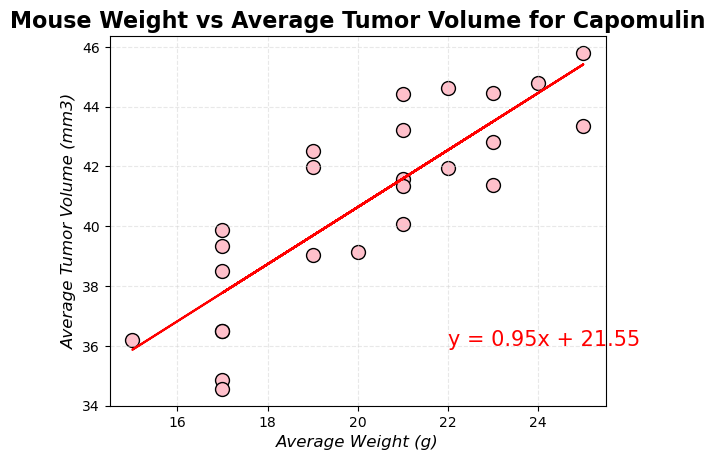

In [84]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Modelling libraries
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


corrs = capomulin_mean.corr(numeric_only = True)
corrs

#x_values = capomulin_mean['Weight (g)']
#y_values = capomulin_mean["Tumor Volume (mm3)"]

# makes best fit line
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_mean['Weight (g)'], capomulin_mean["Tumor Volume (mm3)"])
regress_values = capomulin_mean['Weight (g)'] * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(capomulin_mean['Weight (g)'], capomulin_mean["Tumor Volume (mm3)"], facecolor="pink", edgecolor="black", s=100)
plt.plot(capomulin_mean['Weight (g)'], regress_values, "r-")

# Step 4: Customizations
plt.xlabel("Average Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22,36), fontsize = 15, color='red')

print(f'the r^2 is : {rvalue**2}')
plt.show()
